In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 2値分類  
この章からは主に**分類**について扱っていく。前章までの回帰は連続した値を予測していたのに対し、分類はデータをあらかじめ決めておいたグループのどれにそれが属するかを予測する。この章で扱う2値分類はこのグループが2つのもので、例を挙げると、その人のアンケート結果からその人が男か女かを予測したり、受信したメールが迷惑メールかそうでないかを予測することがあげられる。

$d$次元の特徴ベクトルの事例$\boldsymbol{x}$が与えられたとき、線形モデルのパラメータ$\boldsymbol{w}$との内積を計算し、その正負でラベル$\hat{y}$を予測する。
線形2値分類のラベル推定式は以下のようになる。
$$
\hat{y} = \left\{
    \begin{array}{l}
    1 \qquad (\boldsymbol{x}^\top\boldsymbol{w}>0) \\
    0 \qquad (\boldsymbol{x}^\top\boldsymbol{w}\leqq0)
    \end{array}
\right .
$$


### ロジスティック回帰
ここからはパラメータ$\boldsymbol{w}$を推定していく。ここではロジスティック回帰により線形2値分類を実現していく（回帰とあるが分類に用いられるものである）。このモデルは事例$\boldsymbol{x}$に対するラベル$\hat{y}$の条件付確率$p(y\lvert \boldsymbol{x})$を以下で求める。
$$
p(\hat{y}=1 \lvert \boldsymbol{x}) = \sigma(\boldsymbol{x}^\top\boldsymbol{w}) = \frac{1}{1 + e^{(-\boldsymbol{x}^\top\boldsymbol{w})}}\\
p(\hat{y}=0 \lvert \boldsymbol{x}) = 1 - p(\hat{y}=1 \lvert \boldsymbol{x}) = \sigma(-\boldsymbol{x}\boldsymbol{w}) 
$$
また$\sigma$はシグモイド関数と呼ばれる以下のような関数である。
$$
\sigma(x) = \frac{1}{1 + e^x}
$$
形状は以下のようになる。

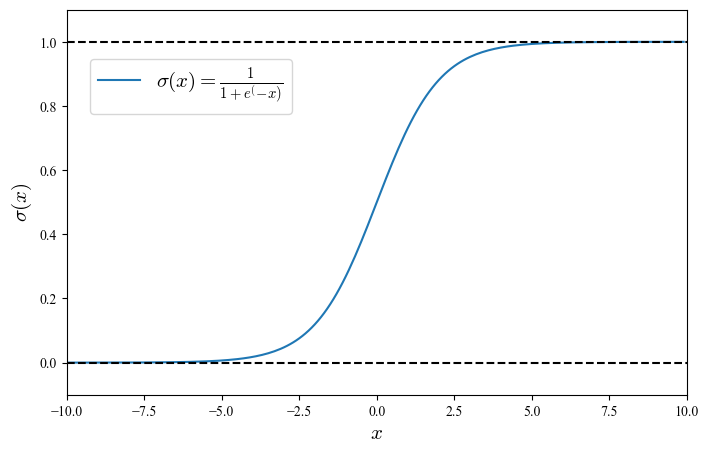

In [22]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.hlines(1.0, -10, 10, colors='black', linestyles='dashed')
ax.hlines(0, -10, 10, colors='black', linestyles='dashed')
ax.set_xlim(-10, 10)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$\sigma(x)$', fontsize=15)
ax.legend([r'$\sigma(x) = \frac{1}{1 + e^(-x)}$'], fontsize=15, loc='upper left', bbox_to_anchor=(0.02, 0.9))
plt.show()

上図でもわかるようにシグモイド関数は以下のような性質を持つ。
$$
\left\{
    \begin{array}{l}
    \lim_{x \to \infty} \sigma(x) = 1 \\
    \lim_{x \to -\infty} \sigma(x) = 0
    \end{array}
    \right .
$$
上図では(-10, 10)の範囲でプロットしているが、実際のシグモイド関数の定義域は$(-\infty, \infty)$である。したがってシグモイド関数は入力を0~1の確率値に変換していることになる。


### 最尤推定
回帰問題では実測値と予測値とのずれを示す指標として残差を使った。しかしこの分類問題においてはこの方法は取れない。なぜなら・・・
そこで代わりに行うのが最尤推定で、最小2乗法が残差を最小化させるのに対し、最尤推定は尤度を最大化させる。尤度とはその確率のもっともらしさで、今回な事例$(\boldsymbol{x}, \hat{y})$に対する尤度$\hat{l}_{\boldsymbol{x},\hat{y}}(\boldsymbol{w})$は以下のようになる。
$$
\hat{l}_{\boldsymbol{x},\hat{y}}(\boldsymbol{w}) = p(\hat{y} = y \lvert \boldsymbol{x}) = \left\{
    \begin{array}{l}
    p(\hat{y} = 1 \lvert \boldsymbol{x}) \quad (y = 1のとき) \\
    p(\hat{y} = 0 \lvert \boldsymbol{x}) \quad (y = 0のとき)
    \end{array}
    \right .
    = p^y(1 - p)^{y - 1}
$$
これを使用することで回帰問題の残差のように学習事例をどのくらい正しく再現できているかを定量的にみることができる。具体的には1に近いほど正しく、0に近いほど間違って再現している。  
またデータ全体に対する尤度$\hat{L}_{D}(\boldsymbol{w})$は
$$
\hat{L}_{D}(\boldsymbol{w}) = \prod^{n}_{i=1}\hat{l}_{\boldsymbol{x}_{i},\hat{y}_{i}}(\boldsymbol{w})
$$
ただし学習データのすべての事例は独立同分布  
したがってこの式がこの分類問題の目的関数であり、これを最大化する$\boldsymbol{w^{*}}$を求めることで、データに合致するモデルパラメータを求めることができる。だが、これは少数の積を繰り返すことになるので、コンピュータで計算を続けていくとじきにアンダーフローを起こす可能性がある。なのでこの尤度の対数をとり、対数尤度を最大化させることを考える。よって最尤推定の目的関数は、
$$
log\hat{L}_{D}(\boldsymbol{w}) = log\prod^{n}_{i=1}\hat{l}_{\boldsymbol{x}_{i},\hat{y}_{i}}(\boldsymbol{w}) = \sum^{N}_{i=1}log\hat{l}_{\boldsymbol{x}_{i},\hat{y}_{i}}(\boldsymbol{w})
$$
また回帰問題では目的関数を最小化させることを考えた。よってこの2値分類でも同様に最小化問題へ帰着させるために上式をマイナス倍する。したがって最尤推定の目的関数$\mathcal{L}^{MLE}_{D}(\boldsymbol{w})$は以下のようになる。
$$
\mathcal{L}_{D}(\boldsymbol{w}) = -log\hat{L}_{D} = -\sum^{N}_{i=1}log\hat{l}_{\boldsymbol{x}_{i},\hat{y}_{i}}(\boldsymbol{w})
$$


### 確率的勾配降下法
目的関数が分かったのでこれまで通り微分値を0としてパラメータを求めていきたいが、この目的関数は凸関数ではなく微分値が0となる解が複数存在するためこの方法は取れない。したがって勾配降下法によるパラメータ推定を行う。しかし、勾配降下法では1回更新するたびにすべてのデータに対する目的関数の勾配を計算するが、データの量が大きいと計算量も大きくなってしまい、時間がとてつもなくかかってしまう。そこで**確率的勾配降下法**を採用する。確率的勾配降下法では1回の学習のたびに1個のデータをランダムに抽出し、このデータのみを使って目的関数の勾配を計算するため計算量が削減できる。

### パラメータ推定
前節よりパラメータ$\boldsymbol{w}$の更新式は、
$$
\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} + \eta_{t}\nabla log\hat{l}_{\boldsymbol{x},y}(\boldsymbol{w}^{(t)})
$$
したがって事例の対数尤度$log\hat{l}_{\boldsymbol{x},y}(\boldsymbol{w})$の$\boldsymbol{w}$に関する偏微分を求めることになる。  
事例の対数尤度は、
$$
\begin{align}
log\hat{l}_{\boldsymbol{x}, y}(\boldsymbol{w}) &= log(p^{y}(1 - p^{(y-1)})) \notag \\
&= ylogp + (y - 1)log(1 - p) \notag
\end{align}
$$
よって
$$
\begin{align}
\frac{\partial}{\partial \boldsymbol{w}}log\hat{l}_{\boldsymbol{x}, y}(\boldsymbol{w}) &= \frac{\partial}{\partial \boldsymbol{w}}\{ylog\sigma(\boldsymbol{x}^\top \boldsymbol{w}) + (1 - y)log(1 - \sigma(\boldsymbol{x}^\top \boldsymbol{w})\} \notag \\
&= \frac{y}{\sigma(\boldsymbol{x}^\top \boldsymbol{w})}\cdot \frac{\partial}{\partial \boldsymbol{w}} + \frac{1-y}{1-\sigma(\boldsymbol{x}^\top \boldsymbol{w})} \cdot \frac{\partial}{\partial \boldsymbol{w}}(1-\sigma(\boldsymbol{x}^\top \boldsymbol{w})) \notag \\ 
&= (\frac{y}{\sigma(\boldsymbol{x}^\top \boldsymbol{w})} - \frac{1-y}{1-\sigma(\boldsymbol{x}^\top \boldsymbol{w})}) \cdot \frac{\partial \sigma(\boldsymbol{x}^\top \boldsymbol{w})}{\partial \boldsymbol{w}} \notag \\
&= (\frac{y}{\sigma(\boldsymbol{x}^\top \boldsymbol{w})} - \frac{1-y}{1-\sigma(\boldsymbol{x}^\top \boldsymbol{w})}) \cdot \frac{\partial \sigma(\boldsymbol{x}^\top \boldsymbol{w})}{\partial \boldsymbol{x}^\top \boldsymbol{w}} \cdot \frac{\partial \boldsymbol{x}^\top \boldsymbol{w}}{\partial \boldsymbol{w}} 
\end{align}
$$
ここで
$$
\begin{align}
\frac{\partial \sigma(\boldsymbol{x}^\top \boldsymbol{w})}{\partial \boldsymbol{x}^\top \boldsymbol{w}} &= \frac{\partial}{\partial \boldsymbol{x}^\top \boldsymbol{w}} \frac{1}{1 + e^{-\boldsymbol{x}^\top \boldsymbol{w}}} \notag \\
&= \frac{e^{-\boldsymbol{x}^\top \boldsymbol{w}}}{1 + e^{-\boldsymbol{x}^\top \boldsymbol{w}}} \notag \\
&= (\frac{1}{\sigma(\boldsymbol{x}^\top \boldsymbol{w})} - 1)\{\sigma(\boldsymbol{x}^\top \boldsymbol{w})\}^{2} \notag \\
&= (1 - \sigma(\boldsymbol{x}^\top \boldsymbol{w}))\sigma(\boldsymbol{x}^\top \boldsymbol{w}) \notag
\end{align}
$$
これを(1)に代入して、
$$
\begin{align}
\frac{\partial}{\partial \boldsymbol{w}}log\hat{l}_{\boldsymbol{x}, y}(\boldsymbol{w}) &= (\frac{y}{\sigma(\boldsymbol{x}^\top \boldsymbol{w})} - \frac{1-y}{1-\sigma(\boldsymbol{x}^\top \boldsymbol{w})}) \cdot (1 - \sigma(\boldsymbol{x}^\top \boldsymbol{w}))\sigma(\boldsymbol{x}^\top \boldsymbol{w}) \cdot \boldsymbol{x}^\top \notag \\
&= \{y(1 - \sigma(\boldsymbol{x}^\top \boldsymbol{w})) - (1 - y)\sigma(\boldsymbol{x}^\top \boldsymbol{w})\}\boldsymbol{x}^\top \notag \\
&= (y - \sigma(\boldsymbol{x}^\top \boldsymbol{w}))\boldsymbol{x}^\top \notag 
\end{align}
$$
以上よりパラメータ更新式は以下のようになる。
$$
\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} + \eta_{t}(y - p^{(t)})\boldsymbol{x}
$$


### 実装